In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import sys
import random
import objaverse
from termcolor import colored

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))
from src import *
objaverse._VERSIONED_PATH=os.path.join('../.objaverse', "hf-objaverse-v1")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate the dataset
##### ℹ️ This notebook requires the ShapeNetCore to be downloaded in the `.shapenet/` root folder.
This notebook generate the dataset as triplets of _rendering_, _UV map_ and _diffuse texture_.
##### ⚠️ This notebook is just a preview of the actual script (see [generate_dataset.py](generate_dataset.py)). The generation of the entire dataset is expensive and thus requires a computation node.

In [6]:
paths = load_shapenetcore_objects()
statistics = pd.read_parquet('statistics.parquet')

  0%|          | 0/34 [00:00<?, ?it/s]

100%|██████████| 34/34 [00:00<00:00, 176.50it/s]


Found 30358 objects


Select only the objects with 1 Mesh, 1 UV map and 1 Diffuse texture

In [7]:
uids = statistics[statistics["valid"]].index

OBJ import of 'model_normalized.obj' took 8.74 ms


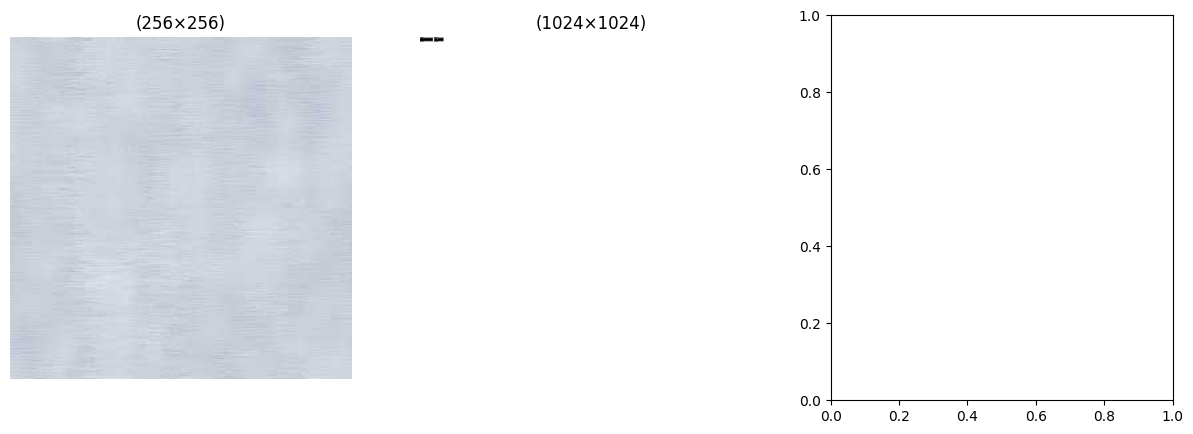

[335c2e4c3991768218ed1f44219ab7b1] UV density = 0.08% --> TOO LOW
OBJ import of 'model_normalized.obj' took 4.52 ms


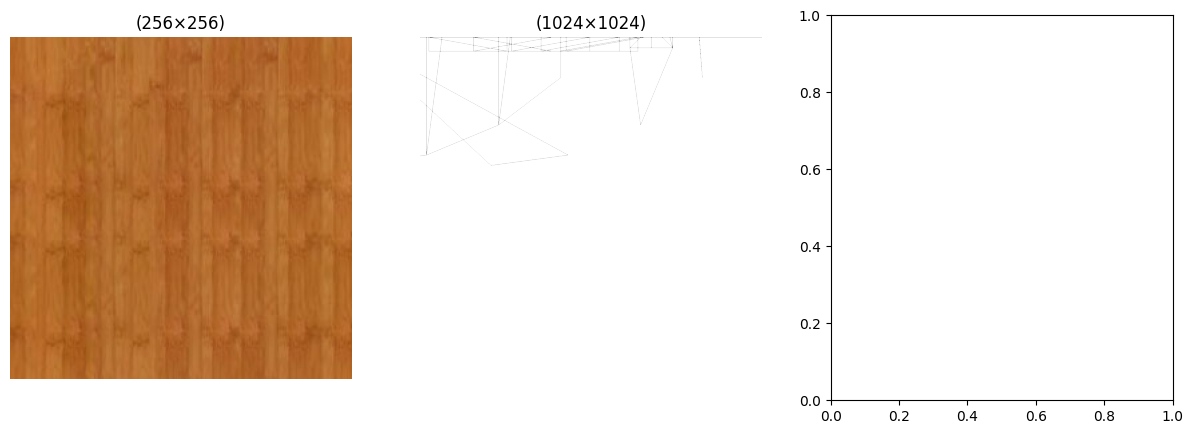

[6110ca3d6213d128c96f5ad2252495c6] UV density = 0.68% --> TOO LOW
OBJ import of 'model_normalized.obj' took 28.77 ms


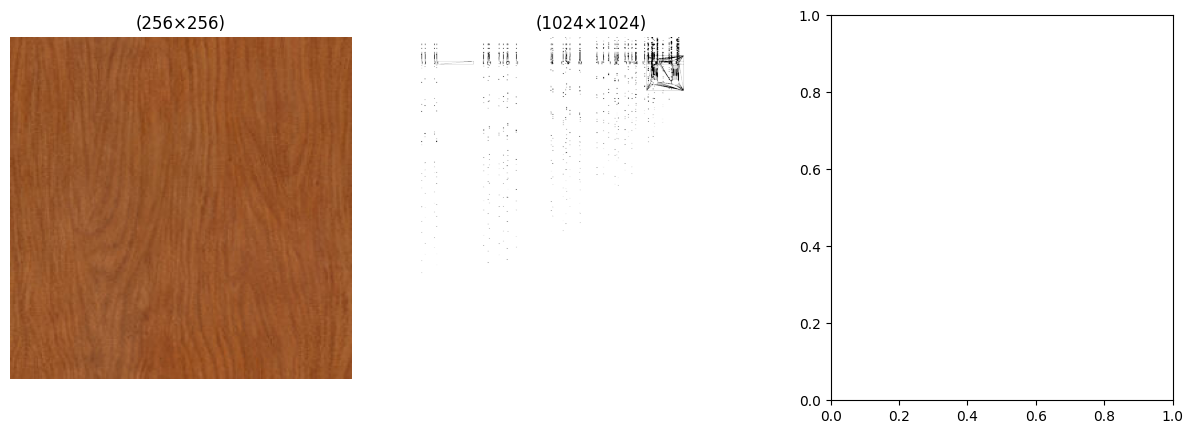

[7249c3e41c4807c0f7e0e05bae6131] UV density = 1.49% --> OK
OBJ import of 'model_normalized.obj' took 48.76 ms


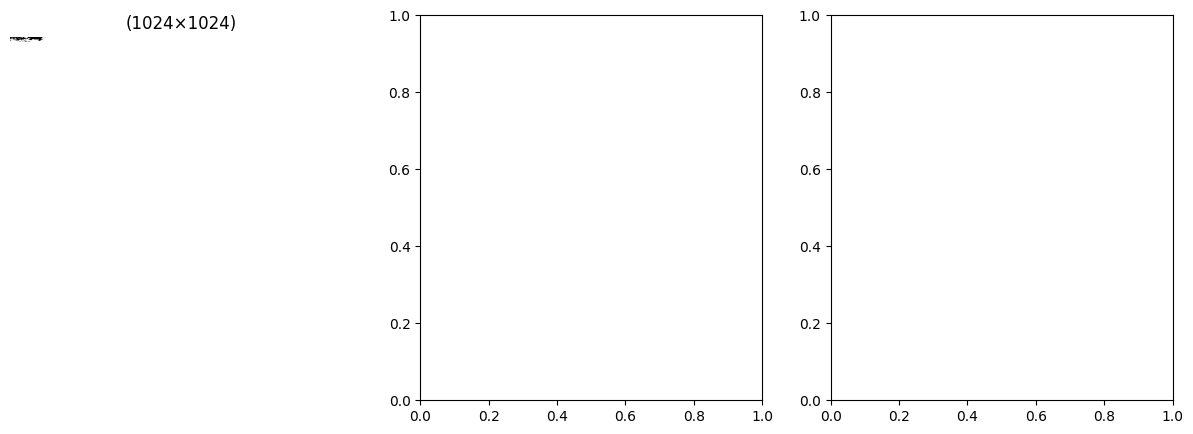

[2a844013c66dd19d32e3a970ba4fb82b] UV density = 0.08% --> TOO LOW
OBJ import of 'model_normalized.obj' took 8.90 ms


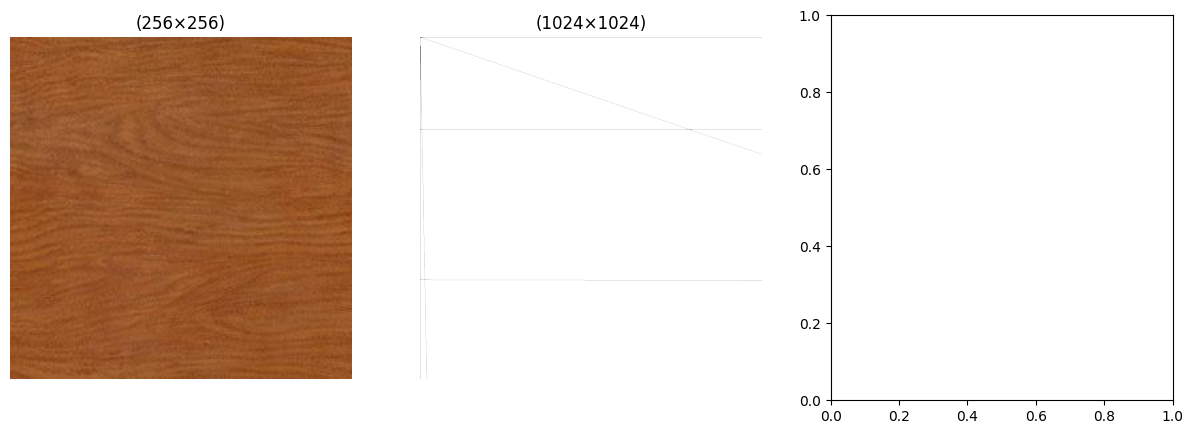

[61c279a6f178a43c5f48f9175316bec] UV density = 0.58% --> TOO LOW


In [10]:
MIN_UV_DENSITY = 0.01
SAMPLES = 5
random.seed(41)

for uid in uids[random.sample(range(len(uids)), SAMPLES)]:
    obj = ShapNetCoreObject3D(uid, paths[uid])

    # Extract diffuse texture
    diffuse = obj.textures
    screenshots =obj.screenshots[:1]

    # Bake UV map
    uv_map = obj.draw_uv_map()

    plot_images([*(diffuse if diffuse else []), uv_map, *screenshots], cols=3, size=5)
    uv_density = compute_opacity(uv_map)
    print(
        colored(
            f"[{uid}] UV density = {uv_density:.2%} --> {'OK' if uv_density > MIN_UV_DENSITY else 'TOO LOW'}",
            "green" if uv_density > MIN_UV_DENSITY else "red",
        )
    )

The UV maps are **very poor**.